In [1]:
import math
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import collections
from numpy import linalg
from collections import Counter
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import re
import os
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
from matplotlib.colors import ListedColormap
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
warnings.filterwarnings("ignore")
from IPython.display import clear_output

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# folder_path = '/content/drive/My Drive/archive'
# os.chdir(folder_path)
# !ls

# Import data
df = pd.read_csv('articles1.csv')
#df2 = pd.read_csv('articles2.csv')
#df3 = pd.read_csv('articles3.csv')

# Merge data into one dataframe
#frames = [df1, df2, df3]
#data = pd.concat(frames)
#display(data.head())
# Convert data column into datetime
df['date'] = pd.to_datetime(df['date'])
columns_to_drop = ['Unnamed: 0', 'year', 'month', 'url']
df = df.drop(columns=columns_to_drop)
df = df.head(500)

In [3]:
# Download NLTK resources
nltk.download('stopwords')

# Function to preprocess content column
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, digits and white space using regex expression
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in text.split() if word not in stop_words]
    # Apply stemming using NLTK PorterStemmer
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_words)

def preprocess_text_lower(text):
    # Converts to lowercase, removes symbols and stopword, but does not stem
    text = text.lower()
    # Remove special characters, digits and white space using regex expression
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to the 'content' column
df['preprocessed_content'] = df['content'].apply(preprocess_text)
df['content_lowercase'] = df['content'].apply(preprocess_text_lower)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arime\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
corpus = df['preprocessed_content'].tolist()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
X = X.toarray()
tfidf_matrix = pd.DataFrame(X)
tfidf_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,18410,18411,18412,18413,18414,18415,18416,18417,18418,18419
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030687,0.0,0.0,...,0.0,0.0,0.0,0.0,0.069215,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [5]:
tfidf_matrix.shape

(500, 18420)

In [6]:
X = tfidf_matrix.values
kmeans = KMeans(n_clusters=26, random_state=0, n_init="auto").fit(X)
labels = kmeans.labels_

In [7]:
display(labels)

array([20, 10, 15,  2, 15, 16, 25, 24, 13, 13, 23, 23,  3, 13, 22, 13, 16,
       17,  9, 13, 11, 13,  9, 10, 20, 20,  2, 12,  9, 19, 13, 17, 13, 21,
       12,  0, 11, 13, 13,  1,  2, 20, 25,  3, 17, 16, 10,  6, 18, 18, 11,
       15, 25, 10,  2, 13, 14, 20,  5,  1,  3, 17, 16,  9,  9, 18, 22,  8,
        8,  4, 17,  3, 13, 25, 15, 17, 12, 25,  2,  6,  0,  2,  4, 12, 18,
       10,  2,  3,  3,  3, 17, 20, 15,  3,  8, 25,  7, 21,  7,  6,  8, 10,
       16, 17, 25, 10, 13,  2, 18,  3,  3,  0,  3,  1,  3, 17,  2, 18, 23,
        6, 21, 13, 10, 18, 17, 14, 15,  2, 12,  6,  2,  2,  6, 18, 13,  3,
        1, 21,  5, 15, 24, 13, 13, 25, 18,  9, 19,  4,  9, 13,  2, 18, 13,
       14,  9, 18,  3,  0,  3,  3, 21, 21, 16, 18, 18, 18, 18, 18,  6, 11,
       17, 17, 10,  9,  7,  9, 18, 17,  0, 18, 13, 18, 17, 13, 17, 22,  4,
       13,  1, 20, 13, 14, 17, 19, 15,  3, 11,  9,  7, 18, 18, 18, 13,  8,
       24, 15,  2, 18, 17, 17,  1, 17,  2, 25,  8, 16, 13, 13, 19, 24, 15,
       15, 12,  3,  1,  1

In [8]:
# Create dataframe with cluster numbers as columns and individual articles as rows (500)
clustered_df = pd.DataFrame()

list_to_append = [] # Row of null values that can be appended to dataframe

for i in range(len(np.unique(labels))):
    clustered_df[str(i)] = ''
    list_to_append.append(np.nan)

# Looping through the cluster labels of the 500 articles
for i in range(len(labels)):
    # Initialize row with null values
    clustered_df.loc[len(clustered_df.index)] = list_to_append
    # Add article to the cluster it belongs to in the dataframe
    clustered_df.loc[i,str(labels[i])] = df.loc[i,'content_lowercase']

clustered_df.shape

(500, 26)

In [9]:
clustered_df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,washington congressional republicans new fear ...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,death may great equalizer isnt necessarily eve...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# This DataFrame has only one row, and the same number of columns as there are clusters.
# Every column contains ALL the text of a given cluster.
text_cluster_df = pd.DataFrame()

list_to_append = [] # Row of null values that can be appended to dataframe

for i in range(clustered_df.shape[1]):
    text_cluster_df[str(i)] = ''
    list_to_append.append(np.nan)

# Initialize first row
text_cluster_df.loc[len(text_cluster_df.index)] = list_to_append

# text_cluster_df.head()

text = []
# Outer loop: The 26 clusters
for i in range(clustered_df.shape[1]):
    # Inner loop: The 500 rows
    for j in range(clustered_df.shape[0]):
        if (pd.notnull(clustered_df.loc[j,str(i)])):
            # If the field is not null, then append the text to be added for the given cluster
            text.append(clustered_df.loc[j,str(i)])
    text_cluster_df.loc[0, str(i)] =  ' '.join(text)
    text = []

In [11]:
text_cluster_df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,explosion september one rockets spacex ready g...,washington supposed triumphant morning republi...,death may great equalizer isnt necessarily eve...,west palm beach fla donald j trump rang new ye...,broadway shows often fold tents end year feari...,washington republicans hope repeal major parts...,time year financial advice sites issue lists s...,question analyst thursday delicate enough agre...,whether music ears pop classical jazz country ...,baghdad suicide bomber detonated pickup truck ...,...,london queen elizabeth ii battling cold week m...,mumbai india bold risky gamble prime minister ...,megyn kelly shift fox news nbc host daily dayt...,washington president obamas advisers wrestled ...,washington congressional republicans new fear ...,ottawa passengers six crew members aboard tarm...,season family travel photos perhaps enlarging ...,donald j trump take control white house would ...,danny cahill stood slightly dazed blizzard con...,beijing president tsai taiwan sharply criticiz...


In [12]:
text_cluster_df.loc[0,'0']

'explosion september one rockets spacex ready get back business sending payloads space company announced monday next rocket headed orbit soon sunday statement spacex formally space exploration technologies corporation said investigation determined likely cause unexpected interplay supercold helium oxygen carbon fibers aluminum statement monday added technical details went wrong company said devised workarounds prevent recurrence cascade explosions sept destroyed falcon rocket launchpad cape canaveral air force station florida perplexing concerning occurred usually regarded safer portion operations fueling propellants eight minutes ignition engines planned test launch scheduled two days later trouble appeared start near liquid oxygen tank second stage rocket less tenth second section flames followed destruction entire rocket million communications satellite whose customers included facebook planned use expand internet services africa current federal laws investigations explosions led co

In [23]:
# WORDCLOUD
wordclouds = []
for i in range(text_cluster_df.shape[1]):

    text = text_cluster_df.loc[0,str(i)]

    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    # plt.imshow(wordcloud, interpolation='bilinear')
    # plt.axis("off")
    # plt.show()

    # lower max_font_size, change the maximum number of word and lighten the background:
    wordcloud = WordCloud(max_font_size=50, max_words=15, background_color="white").generate(text)
    wordclouds.append(wordcloud)
    # plt.figure()
    # plt.imshow(wordcloud, interpolation="bilinear")
    # plt.axis("off")
    # plt.show()

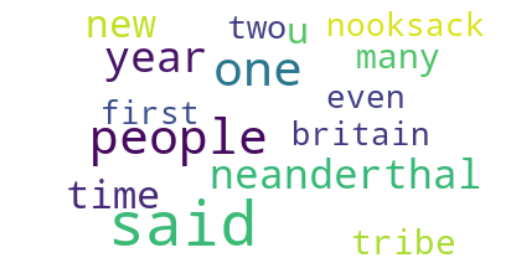

In [25]:
plt.figure()
plt.imshow(wordclouds[2], interpolation="bilinear")
plt.axis("off")
plt.show()

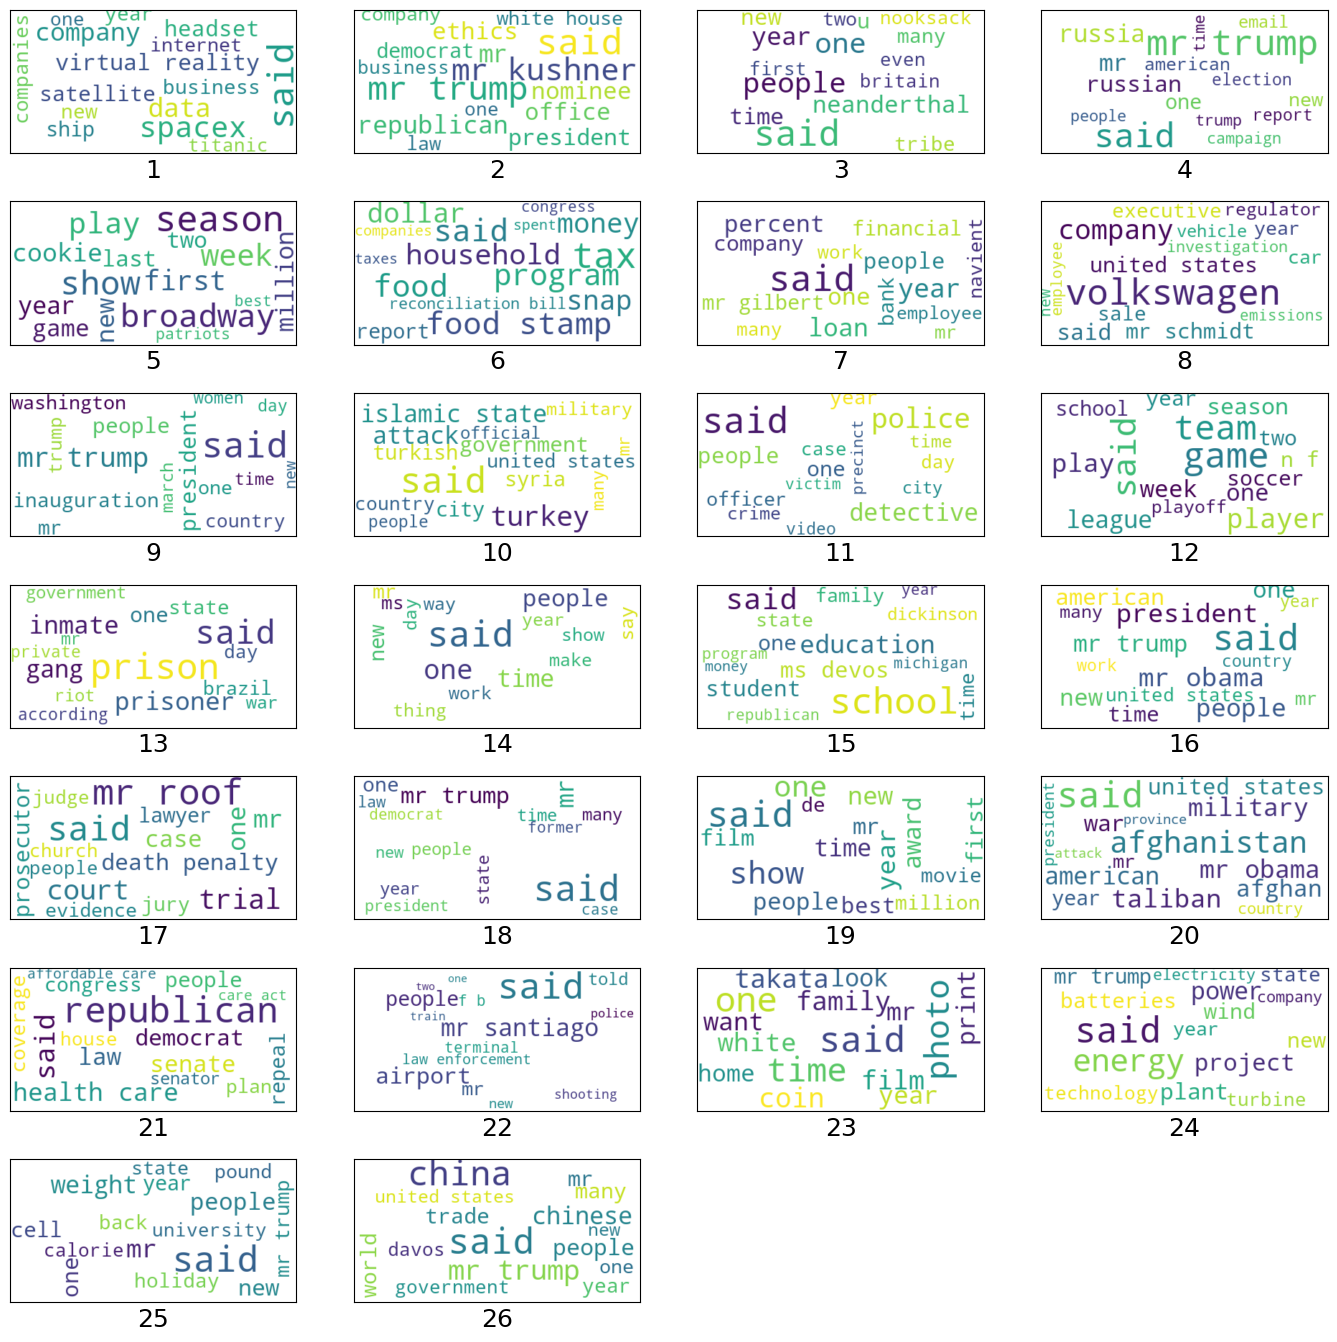

In [90]:
plt.figure(figsize=(17, 17))
# plt.subplots_adjust(hspace=0.1)
# plt.suptitle("Wordclouds", fontsize=18, y=0.95)
for n, cloud in enumerate(wordclouds):
    # add a new subplot iteratively
    ax = plt.subplot(7, 4, n + 1)
    ax.imshow(cloud, interpolation="bilinear")
    ax.set_xlabel(str(n+1), fontsize=18)
    plt.xticks([])
    plt.yticks([])

# plt.savefig('wordclouds-nolib.png', bbox_inches='tight', pad_inches=0.25)